# Classification
Same set of data but 3 differents classifiers
* LogisticRegression
* DecisionTreeClassifier
* RandomForestClassifier

Preprocessing is comon to all models
1. Preprocessing
    1. Import lib
    1. Import dataset
    1. EDA - Exploratory Data Analysis
    1. Separate features from target
    1. Split Train and Test sets (80/20)
    1. Cleaning
        1. Replace missing val (imputers) 
        1. Standardize numerical features + One hot encode categorical variables (transformers)
        1. Encode labels of y

**LogisticRegression**
1. Build the model
    1. Select and train a model
    1. Apply model to train set
    1. Apply model to test set (don't forget imputer & transformers)
1. Evaluate model (confusion matrix, score, precision, recall, score)
1. Features importance

**DecisionTreeClassifier**
1. Build the model
    1. Select and train a model
    1. Apply model to train set
    1. Apply model to test set
1. Evaluate model (confusion matrix, score, precision, recall, score)
1. Features importance

**RandomForestClassifier**
1. Build the model
    1. Select and train a model
    1. Apply model to train set
    1. Apply model to test set
1. Evaluate model (confusion matrix, score, precision, recall, score)
1. Features importance



## Step 1 - Preprocessing

### Step 1.1 - Import libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

### Step 1.2 - Import dataset

In [2]:
df = pd.read_csv("./99-assets/ML/Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


### Step 1.3 - EDA - Exploratory Data Analysis

In [3]:
print(df.shape)                         # (#rows, #columns)
print(df.describe(include="all"))

print()
df.info()


# Vérifier que le count est identique pour toutes les colonnes
# Attention on peut avoir le même nb de valeurs qui manquent partout
# Faut correler avec df.shape
# Vérifier les unités
# Les gammes de valeurs des données

# df.drop(["Country"], axis=1, inplace = True)
# df = df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"])

# vérifier si il y a des lignes dupliquées
# duplicates = df[df.duplicated()]
# print("Duplicate Rows:", duplicates)
# df = df.drop_duplicates()

# df.value_counts()
# df["Country"].value_counts()/len(df)

# print(df[df['Embarked'].isna()])                                      # print lines with NaN
# df.isna().mean() * 100
# df.isna().sum() / len(df) * 100                                       # print nb of Nan as %
# isnull() = isna() mais isna() est plus récente

# Créer des combinaisons de variables
# df["debile"] = df["Salary"]/df["Age"]

# df.drop("debile", axis=1)

# corr_matrix = df.corr(numeric_only=True)
# print(corr_matrix)
# print()
# print(corr_matrix["Survived"].sort_values(ascending=False))

# chercher les outliers
# from scipy.stats import zscore
# z_scores = zscore(df)
# z_scores = np.abs(z_scores)
# outliers = (z_scores > 3).all(axis=1)

# chercher les outliers
# Q1 = df.quantile(0.25)
# Q3 = df.quantile(0.75)
# IQR = Q3 - Q1 # interquartile range
# outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)

#########################################################################
# Graphes
# _ = df.hist(bins=50)                                                  # affiche une matrice avec tous les histogrammes 
# df["Country"].hist()

# from pandas.plotting import scatter_matrix                            # affiche une matrice avec le graphes des correlation entre features 
# attributes = ["nom1", "nom2", "nom3"]
# scatter_matrix(housing[attribute], figsize=(10, 10))

# sns.catplot(data = df, x="Sex", y="Survived", kind="bar")
# housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, 
              #  s=housing["population"]/75, label="population",
              #  c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True, figsize=(15,10))
# _ = plt.legend()

#sns.histplot(df['Positive_Axillary_Nodes'], bins=15, kde=True, color='lightgreen') # kernel density estimate (kde=True) 
                                                                                    # smoothed probability density function

# sns.heatmap(df.corr(numeric_only=True));   

# attributes = ["Age", "Salary"]
# _ = scatter_matrix(df[attributes])

# Camembert
#marital_counts = df['Marital_Status'].value_counts()
#plt.figure(figsize=(10, 6))
#plt.pie(marital_counts, labels=marital_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Blues'))

# Courbe cumulée
# plt.figure(figsize=(10, 6))
# sns.ecdfplot(df['Age_Group'], color='purple')

# Generate heatmap
# corr_matrix = df.corr()
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)

# Plotting violin plots for selected features
# for feature in selected_features:
#     plt.figure(figsize=(8, 6))
#     sns.violinplot(x='Survival_Status', y=feature, data=df, hue='Survival_Status', palette='Blues', inner='quartile', legend=False)
#     plt.title(f'Violin Plot for {feature} by Survival Status')
#     plt.xlabel('Survival Status')
#     plt.ylabel(feature)
#     plt.show()

# sns.pairplot(df, hue='Survival_Status')

# plt.figure(figsize=(7, 6))
# sns.scatterplot(x='Tumor_Size', y='Positive_Axillary_Nodes', data=df, hue='Survival_Status', palette='pastel')

# sns.jointplot(x='Age', y='Positive_Axillary_Nodes', data=df,color='lightblue')
# plt.show()

# sns.jointplot(x = 'patient_age',  y = 'operation_year' , data = df,  kind = 'kde', fill = True)
# plt.show()
  

(400, 5)
             User ID  Gender         Age  EstimatedSalary   Purchased
count   4.000000e+02     400  400.000000       400.000000  400.000000
unique           NaN       2         NaN              NaN         NaN
top              NaN  Female         NaN              NaN         NaN
freq             NaN     204         NaN              NaN         NaN
mean    1.569154e+07     NaN   37.655000     69742.500000    0.357500
std     7.165832e+04     NaN   10.482877     34096.960282    0.479864
min     1.556669e+07     NaN   18.000000     15000.000000    0.000000
25%     1.562676e+07     NaN   29.750000     43000.000000    0.000000
50%     1.569434e+07     NaN   37.000000     70000.000000    0.000000
75%     1.575036e+07     NaN   46.000000     88000.000000    1.000000
max     1.581524e+07     NaN   60.000000    150000.000000    1.000000

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
-

### Step 1.4 - Separate Target from feature variables

In [4]:
features_list = ['Gender', 'Age', 'EstimatedSalary']           # On ne garde pas "User Id"
X = df.loc[:,features_list]                                    
y = df.loc[:,"Purchased"]                                      
# print(X.head())
# print(y.head())                     

### Step 1.5 - Train / Test split 

In [5]:
# si stratify = y       # Allows you to stratify your sample. 
                        # Meaning, you will have the same proportion of categories in test and train set
# test_size=0.2 is completely arbitrary.  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0, 
                                                    stratify = y) # Stratify because y only include boolean values (2 categories)

### Step 1.6 - Cleaning 
1. Remplace missing values - SimpleImputer avec strategy='mean' pour valeurs numériques ou strategy='mode' si il manque des données catégorielles
1. Standardize numerical features + One hot encode categorical variables
1. If y is discrete => Encode labels of y

In [6]:
# num_features_idx va contenir les index des colonnes de type numérique 
# num_features_idx = [1, 2] 
numeric_features = X.select_dtypes(exclude="object").columns.to_list()
numeric_features = X.columns.get_indexer(numeric_features)
# print (*num_features_idx)

# cat_features_idx va contenir les index des colonnes de type chaine 
# cat_features_idx = [0] 
categorical_features = X.select_dtypes(include="object").columns.to_list()
categorical_features = X.columns.get_indexer(categorical_features)
# print (*cat_features_idx)

# In this case, no need to Replace missing values
# imputer = SimpleImputer(strategy="mean")
# X_train.iloc[:,[1,2]] = imputer.fit_transform(X_train.iloc[:,[1,2]])
# categorical_imputer = SimpleImputer(strategy="constant", fill_value="Unknown")

# Standardize numerical features + One hot encode categorical variables
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()   # ! Y a un problème dans le template du cours
                                            # https://app.jedha.co/course/machine-learning-classifications-e/classification-template-e
                                            # Ils disent drop="first" mais à l'affichage y a 4 colonnes
                                            # C'est pas possible

feature_encoder = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),    
        ('num', numeric_transformer, numeric_features)
        ]
    )
X_train = feature_encoder.fit_transform(X_train)
print(X_train[0:5,:])                                               # print first 5 rows (not using iloc since now X_train is now a numpy array)

# In this case, no need to Encode labels of y
# labelencoder = LabelEncoder()    
# y_train = labelencoder.fit_transform(y_train)

[[ 0.          1.         -0.25808475 -0.33624928]
 [ 0.          1.         -0.82439644 -0.77364672]
 [ 0.          1.          1.06330919 -1.21104417]
 [ 0.          1.         -0.35247004 -0.77364672]
 [ 1.          0.          0.9689239   1.87989775]]


## Step 2 - Build the model - LogisticRegression

### 2.1 Select and train a model

In [7]:
# Lire la doc : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
# Par defaut la penalty='l2'
# Dans ce cas, puisqu'il y a de la régulatisation, il n'y a pas besoin de faire drop='first' dans OneHotEncoder
# Lire https://inmachineswetrust.com/posts/drop-first-columns/ à l'occasion
classifier = LogisticRegression(random_state = 0) 

classifier.fit(X_train, y_train)                  # This steps is the actual training

LogisticRegression(random_state=0)

### 2.2 Apply model on train set

In [8]:
y_train_pred = classifier.predict(X_train)
# print(y_train_pred[0:5])                      # print first 5 rows
                                                # ! y_train became a numpy array

### 2.3 Apply model on test set

In [9]:
# Process test set data

# 1.5 - No missing values => No imputer.transform...

# 1.5 - Encoding categorical features and standardizing numeric features
X_test = feature_encoder.transform(X_test)

# 1.5 - No need to encode y labels => No LabelEncoder

In [10]:
# Predictions on test set
# cf 2.1 above
y_test_pred = classifier.predict(X_test) 
#print(y_train_pred[0:5])

## Step 3 - Evaluate the model

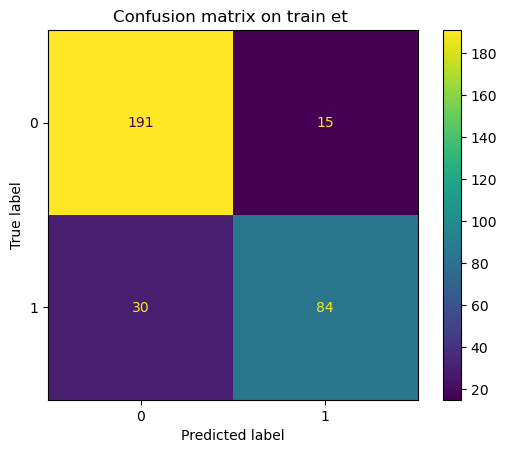

In [11]:
# Plot confusion matrix on train set
cm = confusion_matrix(y_train, y_train_pred, labels=classifier.classes_)
cm_display = ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
cm_display.ax_.set_title("Confusion matrix on train et ") 
plt.show() 



In [12]:
# https://vitalflux.com/accuracy-precision-recall-f1-score-python-example/
# Precision : Out of all the positive predicted, what percentage is truly positive. Spam
# Recall    : Out of the total positive, what percentage are predicted positive.    Medicine, Credit card
# F1        : Harmonic average Recall Precision 
print(f"Precision TP/(TP+FP) - Left col                  : {precision_score(y_train, y_train_pred):.3f}" )
print(f"Recall TP/(TP+FN)  - Bottom line                 : {recall_score(y_train, y_train_pred):.3f}" )
print(f"F1 2/(1/Prec + 1/Rec)                            : {f1_score(y_train, y_train_pred):.3f}" )
print(f"Accuracy (TP+TN)/(TP+FN+TN+FP) - Diag over total : {accuracy_score(y_train, y_train_pred):.3f}" )
print(f"Accuracy on train set                            : {classifier.score(X_train, y_train):.3f}")

Precision TP/(TP+FP) - Left col                  : 0.848
Recall TP/(TP+FN)  - Bottom line                 : 0.737
F1 2/(1/Prec + 1/Rec)                            : 0.789
Accuracy (TP+TN)/(TP+FN+TN+FP) - Diag over total : 0.859
Accuracy on train set                            : 0.859


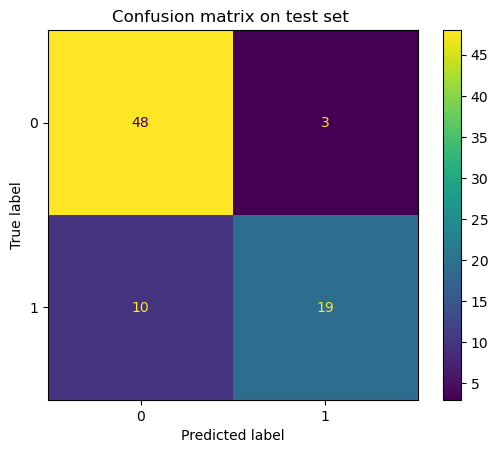

In [13]:
# Plot confusion matrix on test set
cm = confusion_matrix(y_test, y_test_pred, labels=classifier.classes_)
cm_display = ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
cm_display.ax_.set_title("Confusion matrix on test set ") 
plt.show() 

In [14]:
# https://vitalflux.com/accuracy-precision-recall-f1-score-python-example/
# Precision : Out of all the positive predicted, what percentage is truly positive. Credit card
# Recall    : Out of the total positive, what percentage are predicted positive.    Spam
# F1        : Harmonic average Recall Precision 
print(f"Precision TP/(TP+FP) - Left col                  : {precision_score(y_test, y_test_pred):.3f}" )
print(f"Recall TP/(TP+FN)  - Bottom line                 : {recall_score(y_test, y_test_pred):.3f}" )
print(f"F1 2/(1/Prec + 1/Rec)                            : {f1_score(y_test, y_test_pred):.3f}" )
print(f"Accuracy (TP+TN)/(TP+FN+TN+FP) - Diag over total : {accuracy_score(y_test, y_test_pred):.3f}" )
print(f"Accuracy on test set                             : {classifier.score(X_test, y_test):.3f}")

Precision TP/(TP+FP) - Left col                  : 0.864
Recall TP/(TP+FN)  - Bottom line                 : 0.655
F1 2/(1/Prec + 1/Rec)                            : 0.745
Accuracy (TP+TN)/(TP+FN+TN+FP) - Diag over total : 0.838
Accuracy on test set                             : 0.838


## Step 4 - Features importance
If you want to interpret coefficients, make sure you `NORMALIZED` your data in the preprocessing part

In [15]:
# C'est juste pour montrer comment on retrouve la liste des noms des features du ou des OneHotEncoder

# On accède aux transformers du ColumnTransformer feature_encoder
print("All transformers are           : ", *feature_encoder.transformers_)

# On accède au OneHotEncoder
print("One Hot Encoder transformer is : ", feature_encoder.transformers_[0][1])

# On accède aux catégories du OneHotEncoder
# Une liste de 1 ou plusieurs tableaux
# Ici il y a 2 jeux de valeurs dans 2 sous tableaux
print("One Hot Encoder categories are : ", *feature_encoder.transformers_[0][1].categories_)


# print(classifier.coef_)
# print(classifier.coef_.shape)

# print(classifier.coef_.squeeze())
# print(classifier.coef_.squeeze().shape)


All transformers are           :  ('cat', OneHotEncoder(), array([0], dtype=int64)) ('num', StandardScaler(), array([1, 2], dtype=int64))
One Hot Encoder transformer is :  OneHotEncoder()
One Hot Encoder categories are :  ['Female' 'Male']
[[-0.188977    0.18896596  2.22285516  1.08741003]]
(1, 4)
[-0.188977    0.18896596  2.22285516  1.08741003]
(4,)


In [16]:
# On veut construire un dataframe avec 
# une colonne pour les noms des features 
# une colonne avec les valeurs des coefs associés

# On utilise concatenate car il peut y avoir un ou plusieurs tableaux dans la liste feature_encoder.transformers_[0][1].categories_
categorical_column_names = np.concatenate(feature_encoder.transformers_[0][1].categories_)

# numeric_features = une liste avec les indices des colonnes numériques
# .columns retourne le nom des colonnes 
numerical_column_names = X.iloc[:, numeric_features].columns 
all_column_names = np.append(categorical_column_names, numerical_column_names)

feature_importance = pd.DataFrame({
    "feature_names": all_column_names,
    "coefficients" : classifier.coef_.squeeze() # faut passer un tableau 1D. squeeze remove axes of length one from ndarray
})
print(feature_importance)
print(f"Constant is         {classifier.intercept_}\n")


     feature_names  coefficients
0           Female     -0.188977
1             Male      0.188966
2              Age      2.222855
3  EstimatedSalary      1.087410
Constant is         [-1.10030762]



In [17]:
# On veut construire un dataframe avec 
# une colonne pour les noms des features 
# une colonne avec les valeurs des coefs associés

# On utilise concatenate car il peut y avoir un ou plusieurs tableaux dans la liste feature_encoder.transformers_[0][1].categories_
categorical_column_names = np.concatenate(feature_encoder.transformers_[0][1].categories_)

# numeric_features = une liste avec les indices des colonnes numériques
# .columns retourne le nom des colonnes 
numerical_column_names = X.iloc[:, numeric_features].columns 
all_column_names = np.append(categorical_column_names, numerical_column_names)

feature_importance = pd.DataFrame({
    "feature_names": all_column_names,
    "coefficients" : classifier.coef_.squeeze() # CAREFUL HERE. We need to access first index of our list because 
                                                # Data needs to be 1 dimensional
                                                # That's what .squeeze() is for
})
print(feature_importance)
print(f"Constant is         {classifier.intercept_}\n")

     feature_names  coefficients
0           Female     -0.188977
1             Male      0.188966
2              Age      2.222855
3  EstimatedSalary      1.087410
Constant is         [-1.10030762]



$$ 
y = \frac{1}{1+e^{-0.18 \times Female + 0.18 \times Male + 2.22 \times Age + 1.08 \times EstimatedSalary - 1.10}}
$$

In [18]:
# En chantier : Voir que par rapport à l'équation précédente, ici on écrit la formule avec les variables
# Comme ça si ça les valeurs changent on à rien à faire.

# TODO : à terminer et à rendre encore plus générique 

from IPython.display import Latex
feature0 = feature_importance.loc[0, "feature_names"]
coef0 = feature_importance.loc[0, "coefficients"].round(2)

feature1 = feature_importance.loc[1, "feature_names"]
coef1 = feature_importance.loc[1, "coefficients"].round(2)

feature2 = feature_importance.loc[2, "feature_names"]
coef2 = feature_importance.loc[2, "coefficients"].round(2)

constant = classifier.intercept_[0].round(2)

Latex(f"""\\begin{{equation*}}
y = \\frac{1}{{1 + e^{{   {coef0}*{feature0}  + {coef1}*{feature1}  + {coef2}*{feature2}  + {constant}   }}                      }}
\\end{{equation*}}
""")

<IPython.core.display.Latex object>

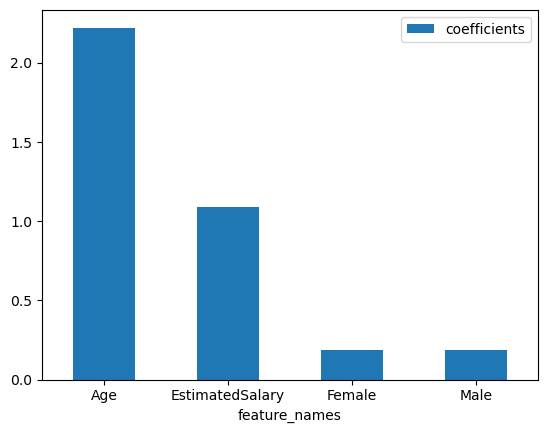

In [19]:
feature_importance["coefficients"] = feature_importance["coefficients"].abs()
feature_importance.sort_values(by="coefficients", ascending=False).plot(kind="bar", x="feature_names") # , figsize=(16*.65, 9*.65)
_ = plt.xticks(rotation=0)


## Step 2 - Build the model - DecisionTreeClassifier

### 2.1 Select and train a model

In [20]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

### 2.2 Apply model on train set

In [21]:
y_train_pred = classifier.predict(X_train)

### 2.3 Apply model on test set

In [22]:
y_test_pred = classifier.predict(X_test)

## Step 3 - Evaluate the model

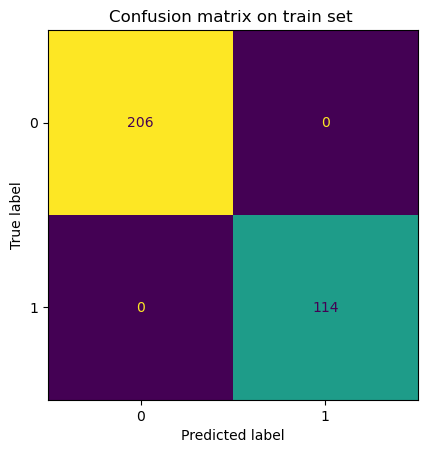

In [23]:
# Plot confusion matrix on train set
cm = confusion_matrix(y_train, y_train_pred, labels=classifier.classes_)
cm_display = ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, colorbar=False)
cm_display.ax_.set_title("Confusion matrix on train set ")

plt.show()


In [24]:
# https://vitalflux.com/accuracy-precision-recall-f1-score-python-example/
# Precision : Out of all the positive predicted, what percentage is truly positive. Spam
# Recall    : Out of the total positive, what percentage are predicted positive.    Medicine, Credit card
# F1        : Harmonic average Recall Precision 
print(f"Precision TP/(TP+FP) - Left col                  : {precision_score(y_train, y_train_pred):.3f}" )
print(f"Recall TP/(TP+FN)  - Bottom line                 : {recall_score(y_train, y_train_pred):.3f}" )
print(f"F1 2/(1/Prec + 1/Rec)                            : {f1_score(y_train, y_train_pred):.3f}" )
print(f"Accuracy (TP+TN)/(TP+FN+TN+FP) - Diag over total : {accuracy_score(y_train, y_train_pred):.3f}" )
print(f"Accuracy       on train set                      : {classifier.score(X_train, y_train):.3f}")

Precision TP/(TP+FP) - Left col                  : 1.000
Recall TP/(TP+FN)  - Bottom line                 : 1.000
F1 2/(1/Prec + 1/Rec)                            : 1.000
Accuracy (TP+TN)/(TP+FN+TN+FP) - Diag over total : 1.000
Accuracy       on train set                      : 1.000


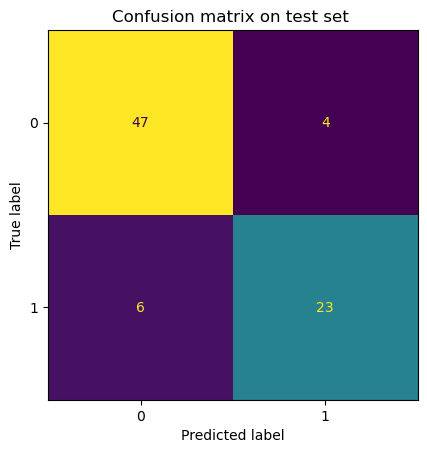

In [25]:
# Plot confusion matrix on test set
cm = confusion_matrix(y_test, y_test_pred, labels=classifier.classes_)
cm_display = ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred, colorbar=False)
cm_display.ax_.set_title("Confusion matrix on test set ") 
plt.show()

In [26]:
# https://vitalflux.com/accuracy-precision-recall-f1-score-python-example/
# Precision : Out of all the positive predicted, what percentage is truly positive. Spam
# Recall    : Out of the total positive, what percentage are predicted positive.    Medicine, Credit card
# F1        : Harmonic average Recall Precision 
print(f"Precision TP/(TP+FP) - Left col                  : {precision_score(y_test, y_test_pred):.3f}" )
print(f"Recall TP/(TP+FN)  - Bottom line                 : {recall_score(y_test, y_test_pred):.3f}" )
print(f"F1 2/(1/Prec + 1/Rec)                            : {f1_score(y_test, y_test_pred):.3f}" )
print(f"Accuracy (TP+TN)/(TP+FN+TN+FP) - Diag over total : {accuracy_score(y_test, y_test_pred):.3f}" )
print(f"Accuracy on train set                            : {classifier.score(X_test, y_test):.3f}")

Precision TP/(TP+FP) - Left col                  : 0.852
Recall TP/(TP+FN)  - Bottom line                 : 0.793
F1 2/(1/Prec + 1/Rec)                            : 0.821
Accuracy (TP+TN)/(TP+FN+TN+FP) - Diag over total : 0.875
Accuracy on train set                            : 0.875


## Step 4 - Feature importance

In [27]:
# # On veut construire un dataframe avec 
# # une colonne pour les noms des features 
# # une colonne avec les valeurs des coefs associés

# # On utilise concatenate car il peut y avoir un ou plusieurs tableaux dans la liste feature_encoder.transformers_[0][1].categories_
# categorical_column_names = np.concatenate(feature_encoder.transformers_[0][1].categories_)

# # numeric_features = une liste avec les indices des colonnes numériques
# # .columns retourne le nom des colonnes 
# numerical_column_names = X.iloc[:, numeric_features].columns 
# all_column_names = np.append(categorical_column_names, numerical_column_names)

feature_importance = pd.DataFrame({
    "feature_names": all_column_names,
    "coefficients" : classifier.feature_importances_              # We use to have regressor.coef_.squeeze() 
                                                                  # TODO : add more comment
})
print(feature_importance)
#  print(f"Constant is         {regressor.intercept_:.6f}\n")     # There is no intercept in a tree

     feature_names  coefficients
0           Female      0.018168
1             Male      0.000000
2              Age      0.523397
3  EstimatedSalary      0.458435


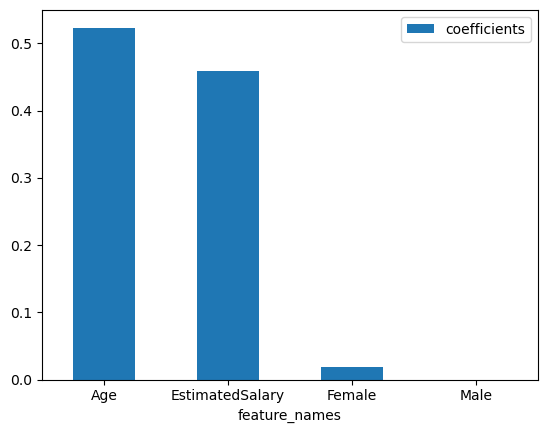

In [28]:
feature_importance["coefficients"] = feature_importance["coefficients"].abs()
feature_importance.sort_values(by="coefficients", ascending=False).plot(kind="bar", x="feature_names")
_ = plt.xticks(rotation=0)


## Step 2 - Build the model - RandomForestClassifier

### 2.1 Select and train a model

In [29]:
# This is an advanced model, you'll need to tune `_estimators
classifier = RandomForestClassifier(n_estimators = 30)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=30)

### 2.2 Apply model on train set

In [30]:
y_train_pred = classifier.predict(X_train)

### 2.3 Apply model on test set

In [31]:
y_test_pred = classifier.predict(X_test)

## Step 3 - Evaluate the model

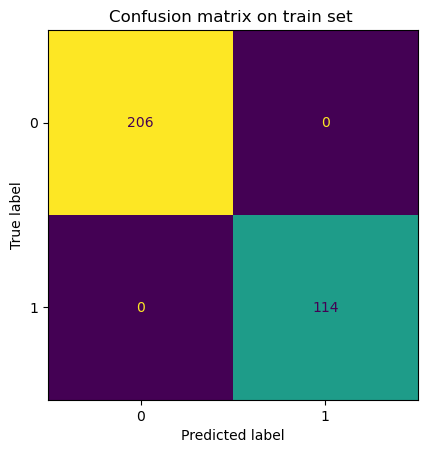

In [32]:
# Plot confusion matrix on train set
cm = confusion_matrix(y_train, y_train_pred, labels=classifier.classes_)
cm_display = ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, colorbar=False)
cm_display.ax_.set_title("Confusion matrix on train set ") 
plt.show() 

In [33]:
# https://vitalflux.com/accuracy-precision-recall-f1-score-python-example/
# Precision : Out of all the positive predicted, what percentage is truly positive. Spam
# Recall    : Out of the total positive, what percentage are predicted positive.    Medicine, Credit card
# F1        : Harmonic average Recall Precision 
print(f"Precision TP/(TP+FP) - Left col                  : {precision_score(y_train, y_train_pred):.3f}" )
print(f"Recall TP/(TP+FN)  - Bottom line                 : {recall_score(y_train, y_train_pred):.3f}" )
print(f"F1 2/(1/Prec + 1/Rec)                            : {f1_score(y_train, y_train_pred):.3f}" )
print(f"Accuracy (TP+TN)/(TP+FN+TN+FP) - Diag over total : {accuracy_score(y_train, y_train_pred):.3f}" )
print(f"Accuracy on train set                            : {classifier.score(X_train, y_train):.3f}")

Precision TP/(TP+FP) - Left col                  : 1.000
Recall TP/(TP+FN)  - Bottom line                 : 1.000
F1 2/(1/Prec + 1/Rec)                            : 1.000
Accuracy (TP+TN)/(TP+FN+TN+FP) - Diag over total : 1.000
Accuracy on train set                            : 1.000


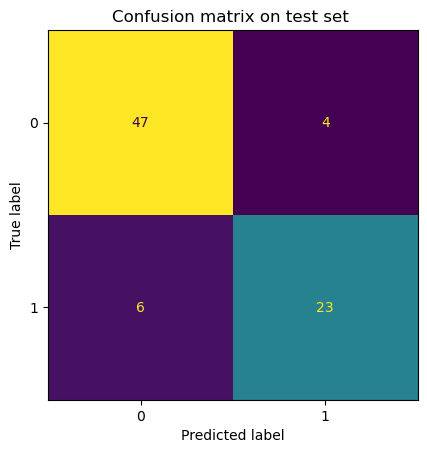

In [34]:
# Plot confusion matrix on test set
cm = confusion_matrix(y_test, y_test_pred, labels=classifier.classes_)
cm_display = ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred, colorbar=False)
cm_display.ax_.set_title("Confusion matrix on test set ") 
plt.show() 

In [35]:
# https://vitalflux.com/accuracy-precision-recall-f1-score-python-example/
# Precision : Out of all the positive predicted, what percentage is truly positive. Spam
# Recall    : Out of the total positive, what percentage are predicted positive.    Medicine, Credit card
# F1        : Harmonic average Recall Precision 
print(f"Precision TP/(TP+FP) - Left col                  : {precision_score(y_test, y_test_pred):.3f}" )
print(f"Recall TP/(TP+FN)  - Bottom line                 : {recall_score(y_test, y_test_pred):.3f}" )
print(f"F1 2/(1/Prec + 1/Rec)                            : {f1_score(y_test, y_test_pred):.3f}" )
print(f"Accuracy (TP+TN)/(TP+FN+TN+FP) - Diag over total : {accuracy_score(y_test, y_test_pred):.3f}" )
print(f"Accuracy on test set                             : {classifier.score(X_test, y_test):.3f}")

Precision TP/(TP+FP) - Left col                  : 0.852
Recall TP/(TP+FN)  - Bottom line                 : 0.793
F1 2/(1/Prec + 1/Rec)                            : 0.821
Accuracy (TP+TN)/(TP+FN+TN+FP) - Diag over total : 0.875
Accuracy on test set                             : 0.875


## Step 4 - Feature importance

In [36]:
# # On veut construire un dataframe avec 
# # une colonne pour les noms des features 
# # une colonne avec les valeurs des coefs associés

# # On utilise concatenate car il peut y avoir un ou plusieurs tableaux dans la liste feature_encoder.transformers_[0][1].categories_
# categorical_column_names = np.concatenate(feature_encoder.transformers_[0][1].categories_)

# # numeric_features = une liste avec les indices des colonnes numériques
# # .columns retourne le nom des colonnes 
# numerical_column_names = X.iloc[:, numeric_features].columns 
# all_column_names = np.append(categorical_column_names, numerical_column_names)

feature_importance = pd.DataFrame({
    "feature_names": all_column_names,
    "coefficients" : classifier.feature_importances_              # We use to have regressor.coef_.squeeze() 
                                                                  # TODO : add more comment
})
print(feature_importance)
#  print(f"Constant is         {regressor.intercept_:.6f}\n")     # There is no intercept in a tree

     feature_names  coefficients
0           Female      0.008082
1             Male      0.009874
2              Age      0.526274
3  EstimatedSalary      0.455770


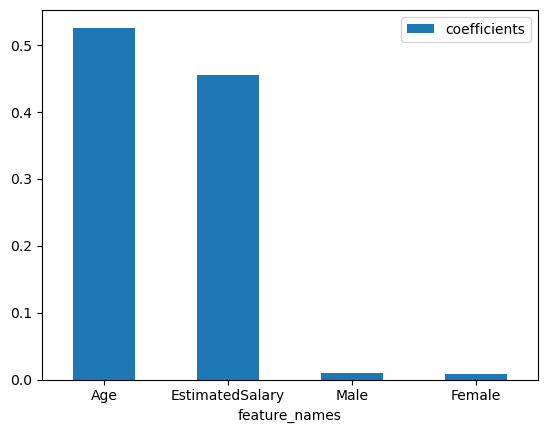

In [37]:
feature_importance["coefficients"] = feature_importance["coefficients"].abs()
feature_importance.sort_values(by="coefficients", ascending=False).plot(kind="bar", x="feature_names")
_ = plt.xticks(rotation=0)


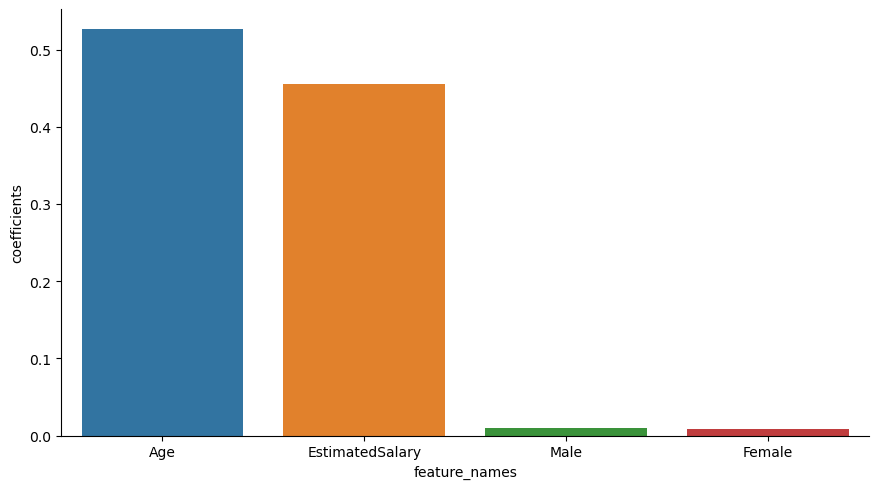

In [38]:
sns.catplot(feature_importance.sort_values(by="coefficients", ascending=False), 
            x="feature_names", 
            y="coefficients", 
            kind="bar",
            hue = "feature_names",
            aspect=16/9,
            ); 